In [2]:
# !pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 161.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 159.3 MB/s eta 0:00:00


In [1]:
import pandas as pd
import json

data = []
with open("train.jsonl", "r") as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error in line: {line}")
            print(e)

df = pd.DataFrame(data)
print(df.head())


       id      verifiable            label  \
0   75397      VERIFIABLE         SUPPORTS   
1  150448      VERIFIABLE         SUPPORTS   
2  214861      VERIFIABLE         SUPPORTS   
3  156709      VERIFIABLE          REFUTES   
4   83235  NOT VERIFIABLE  NOT ENOUGH INFO   

                                               claim  \
0  Nikolaj Coster-Waldau worked with the Fox Broa...   
1                 Roman Atwood is a content creator.   
2  History of art includes architecture, dance, s...   
3                  Adrienne Bailon is an accountant.   
4       System of a Down briefly disbanded in limbo.   

                                            evidence  
0  [[[92206, 104971, Nikolaj_Coster-Waldau, 7], [...  
1  [[[174271, 187498, Roman_Atwood, 1]], [[174271...  
2            [[[255136, 254645, History_of_art, 2]]]  
3           [[[180804, 193183, Adrienne_Bailon, 0]]]  
4                     [[[100277, None, None, None]]]  


In [2]:
df.describe()

,id
count,145449.000000
mean,113446.911701
std,66658.163706
min,3.000000
25%,55530.000000
50%,112303.000000
75%,170904.000000
max,229449.000000


In [3]:
df = df[df['verifiable'] != 'NOT VERIFIABLE']
df

,id,verifiable,label,claim,evidence
0,75397,VERIFIABLE,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [..."
1,150448,VERIFIABLE,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271..."
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]"
3,156709,VERIFIABLE,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]"
5,129629,VERIFIABLE,SUPPORTS,Homeland is an American television spy thrille...,"[[[151831, 166598, Homeland_-LRB-TV_series-RRB..."
...,...,...,...,...,...
145444,75062,VERIFIABLE,REFUTES,Led Zeppelin released an eponymous debut album...,"[[[91851, 104659, Led_Zeppelin, 6], [91851, 10..."
145445,149256,VERIFIABLE,SUPPORTS,Taal was romantic.,"[[[292586, 285327, Taal_-LRB-film-RRB-, 0]], [..."
145446,13287,VERIFIABLE,SUPPORTS,Her stars American actress Rooney Mara.,"[[[28520, 34848, Her_-LRB-film-RRB-, 3], [2852..."
145447,13114,VERIFIABLE,SUPPORTS,J. R. R. Tolkien created Gimli.,"[[[28359, 34669, Gimli_-LRB-Middle-earth-RRB-,..."


In [4]:
df = df[df['label'] != 'NOT ENOUGH INFO']
df

,id,verifiable,label,claim,evidence
0,75397,VERIFIABLE,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [..."
1,150448,VERIFIABLE,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271..."
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]"
3,156709,VERIFIABLE,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]"
5,129629,VERIFIABLE,SUPPORTS,Homeland is an American television spy thrille...,"[[[151831, 166598, Homeland_-LRB-TV_series-RRB..."
...,...,...,...,...,...
145444,75062,VERIFIABLE,REFUTES,Led Zeppelin released an eponymous debut album...,"[[[91851, 104659, Led_Zeppelin, 6], [91851, 10..."
145445,149256,VERIFIABLE,SUPPORTS,Taal was romantic.,"[[[292586, 285327, Taal_-LRB-film-RRB-, 0]], [..."
145446,13287,VERIFIABLE,SUPPORTS,Her stars American actress Rooney Mara.,"[[[28520, 34848, Her_-LRB-film-RRB-, 3], [2852..."
145447,13114,VERIFIABLE,SUPPORTS,J. R. R. Tolkien created Gimli.,"[[[28359, 34669, Gimli_-LRB-Middle-earth-RRB-,..."


In [5]:
df.drop('verifiable', axis=1)

,id,label,claim,evidence
0,75397,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [..."
1,150448,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271..."
2,214861,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]"
3,156709,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]"
5,129629,SUPPORTS,Homeland is an American television spy thrille...,"[[[151831, 166598, Homeland_-LRB-TV_series-RRB..."
...,...,...,...,...
145444,75062,REFUTES,Led Zeppelin released an eponymous debut album...,"[[[91851, 104659, Led_Zeppelin, 6], [91851, 10..."
145445,149256,SUPPORTS,Taal was romantic.,"[[[292586, 285327, Taal_-LRB-film-RRB-, 0]], [..."
145446,13287,SUPPORTS,Her stars American actress Rooney Mara.,"[[[28520, 34848, Her_-LRB-film-RRB-, 3], [2852..."
145447,13114,SUPPORTS,J. R. R. Tolkien created Gimli.,"[[[28359, 34669, Gimli_-LRB-Middle-earth-RRB-,..."


SPLIT DATA

In [6]:
# !pip install scikit-learn

In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset (assuming "claim" is the text and "label" is the target)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")


Train size: 87848, Test size: 21962


Tokenize data

In [11]:
# !pip install transformers

In [7]:
from transformers import RobertaTokenizer

# Load RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize_function(examples):
    return tokenizer(examples["claim"], truncation=True, padding="max_length", max_length=512)

# Tokenize train and test sets
train_encodings = tokenizer(list(train_df["claim"]), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(test_df["claim"]), truncation=True, padding=True, max_length=512)


Convert Labels to Numeric Format

In [8]:
label_mapping = {"SUPPORTS": 0, "REFUTES": 1, "NOT ENOUGH INFO": 2}  # Adjust as needed

train_labels = [label_mapping[label] for label in train_df["label"]]
test_labels = [label_mapping[label] for label in test_df["label"]]


Prepare Dataset for PyTorch

In [14]:
# !pip install torch

In [9]:
import torch

class FEVERDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = FEVERDataset(train_encodings, train_labels)
test_dataset = FEVERDataset(test_encodings, test_labels)


Load RoBERTa Model

In [10]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# Define compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average="weighted")
    recall = recall_score(labels, predictions, average="weighted")
    f1 = f1_score(labels, predictions, average="weighted")

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }


In [18]:
# !pip install transformers[torch]
# !pip install accelerate>=0.26.0

Set Up Training Arguments

In [12]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)


/common/home/projectgrps/IS424/IS424G4/jupyterlab-venv-pytorch-240/lib/python3.11/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Train the Model

In [13]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.394400,0.332706,0.868272,0.865736,0.868272,0.862612
2,0.260400,0.309375,0.878017,0.877258,0.878017,0.872159
3,0.169400,0.345388,0.879792,0.877511,0.879792,0.875722


TrainOutput(global_step=16473, training_loss=0.3036986659989073, metrics={'train_runtime': 1483.3291, 'train_samples_per_second': 177.671, 'train_steps_per_second': 11.105, 'total_flos': 1.5439421351630304e+16, 'train_loss': 0.3036986659989073, 'epoch': 3.0})

In [15]:
# SUPPORTS = 0, REFUTES = 1
from sklearn.metrics import classification_report

# Get predictions from the trained model
predictions = trainer.predict(test_dataset)

# Extract logits and true labels
logits, labels = predictions.predictions, predictions.label_ids

# Convert logits to class predictions
y_pred = np.argmax(logits, axis=-1)
y_true = labels  # Actual labels from test dataset

# Print classification report
report = classification_report(y_true, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8899    0.9520    0.9199     15926
           1     0.8448    0.6892    0.7591      6036

    accuracy                         0.8798     21962
   macro avg     0.8674    0.8206    0.8395     21962
weighted avg     0.8775    0.8798    0.8757     21962



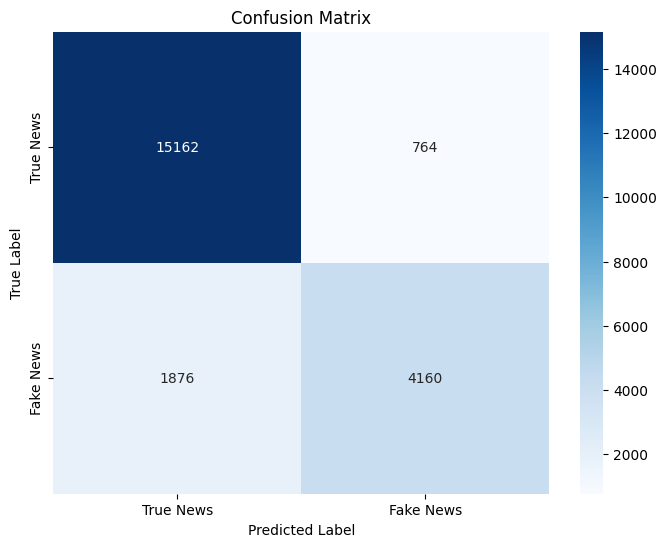

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)  # Get the predicted class indices
true_labels = test_labels  # Ground truth labels

# Compute confusion matrix
cm = confusion_matrix(true_labels, preds)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["True News", "Fake News"], yticklabels=["True News", "Fake News"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Evaluate the Model

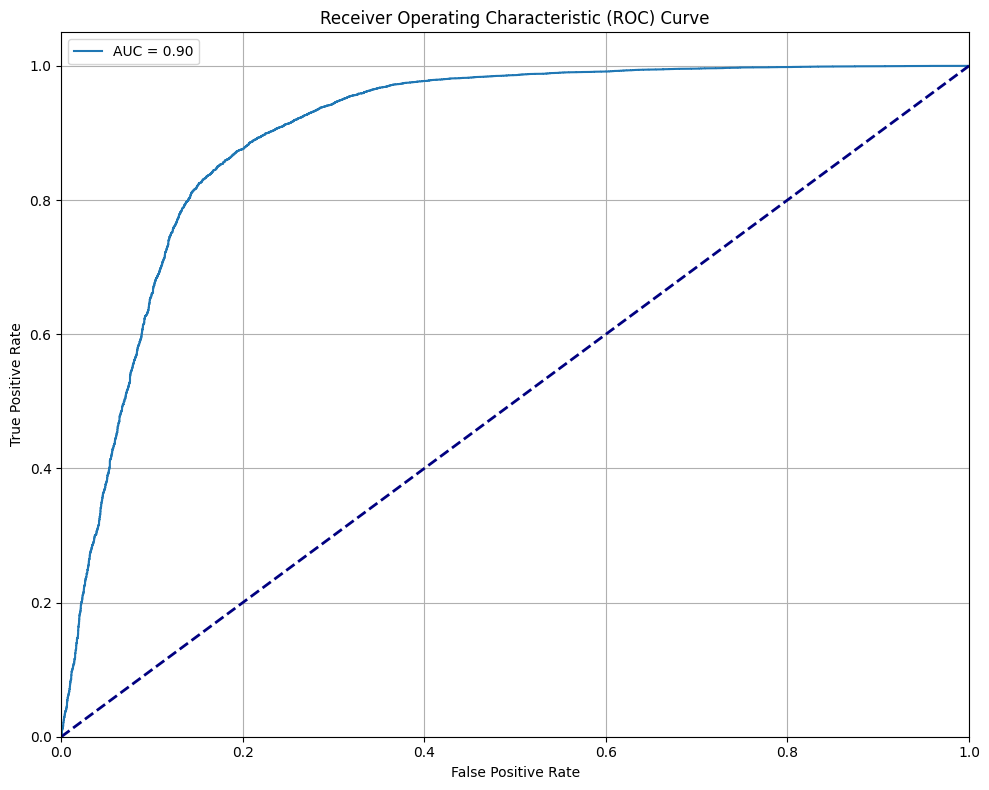

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predictions with probability scores from your trained model
predictions = trainer.predict(test_dataset)

# Extract probabilities for class 0 (positive class)
y_pred_proba = predictions.predictions[:, 0]  # Get scores for class 0 (positive)
y_true = predictions.label_ids  # True labels

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba, pos_label=0)  # Set pos_label=0 for positive class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="upper left")  # Add legend to the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
trainer.evaluate()

{'eval_loss': 0.3453884422779083,
 'eval_accuracy': 0.8797923686367362,
 'eval_precision': 0.8775112755861418,
 'eval_recall': 0.8797923686367362,
 'eval_f1': 0.8757217725767135,
 'eval_runtime': 32.3086,
 'eval_samples_per_second': 679.757,
 'eval_steps_per_second': 42.496,
 'epoch': 3.0}